In [1]:
# import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import requests

In [42]:
url_impianti = "https://www.mise.gov.it/images/exportCSV/anagrafica_impianti_attivi.csv"

df_impianti = (
    pd.read_csv(url_impianti, delimiter=';', skiprows=1, on_bad_lines='skip')
    .dropna(subset=['Latitudine', 'Longitudine']).reset_index(drop=True)
    .fillna("")
)

geo_stations = gpd.GeoDataFrame(
    df_impianti.drop(columns=['Latitudine', 'Longitudine']),
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(df_impianti.Longitudine, df_impianti.Latitudine)
)

geo_stations = (
    geo_stations
    .loc[geo_stations.geometry.is_valid,:]
    .assign(
        geom=lambda x: x.geometry.apply(lambda x: x.wkt),
    )
    .drop(columns=["geometry"])
    .rename(columns={'geom': 'geometry'})
)

geo_stations.head()

idImpianto                                           Gestore      Bandiera  \
0       52829                                       ERRA NICOLA        Api-Ip   
1       55389                                                          Api-Ip   
2       23778  ALFONSO DI BENEDETTO CARBURANTI LUBRIFICANTI SRL  Sicilpetroli   
3       49195                 EOS SERVICES S.R.L. A SOCIO UNICO            Q8   
4       49460                 EOS SERVICES S.R.L. A SOCIO UNICO            Q8   

  Tipo Impianto                     Nome Impianto  \
0      Stradale                                     
1      Stradale                                     
2      Stradale  A. Di Benedetto srl Via Imera Ag   
3      Stradale                             AG021   
4      Stradale                             AG023   

                                           Indirizzo     Comune Provincia  \
0                                                                           
1  VIA S.S.158 KM 2+700 SNC 81016, PIEDIMONTE MAT...                        
2        VIA IMERA SN 92100, AGRIGENTO (AG) 10 92100  AGRIGENTO        AG   
3                            VIA PETRARCA S.N. 92100  AGRIGENTO        AG   
4                     CONTRADA FONTANELLE S.N. 92100  AGRIGENTO        AG   

                                       geometry  
0                 POINT (14.9413282 40.7160385)  
1                 POINT (14.3634188 41.3438608)  
2  POINT (13.58591309570079 37.312390927445705)  
3  POINT (13.589792251586909 37.29823424642592)  
4  POINT (13.591820001602168 37.32612049037331)

In [43]:
geo_stations.dtypes.to_dict()

{'idImpianto': dtype('int64'),
 'Gestore': dtype('O'),
 'Bandiera': dtype('O'),
 'Tipo Impianto': dtype('O'),
 'Nome Impianto': dtype('O'),
 'Indirizzo': dtype('O'),
 'Comune': dtype('O'),
 'Provincia': dtype('O'),
 'geometry': dtype('O')}

In [44]:
import sqlite3

conn = sqlite3.connect('mydatabase.db')

impianti_dtypes = {'idImpianto': 'INTEGER',
                   'Gestore': 'TEXT',
                   'Bandiera': 'TEXT',
                   'Tipo Impianto': 'TEXT',
                   'Nome Impianto': 'TEXT',
                   'Indirizzo': 'TEXT',
                   'Comune': 'TEXT',
                   'Provincia': 'TEXT',
                   'geometry': 'TEXT'
                   }

geo_stations.to_sql(
    'impianti',
    conn,
    if_exists='replace',
    index=False,
    dtype=impianti_dtypes,
    index_label='idImpianto'
)


22263

In [47]:
import json

with open("./../data/municipalities.geojson") as f:
    municipalities = json.load(f)

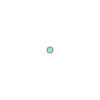

In [54]:
from shapely.geometry import Point

Point(14.9413282, 40.7160385)

In [51]:
municipalities['features'][0]['properties']

{'COD_RIP': 1,
 'COD_REG': 1,
 'COD_PROV': 1,
 'COD_CM': 201,
 'COD_UTS': 201,
 'PRO_COM': 1001,
 'PRO_COM_T': '001001',
 'COMUNE': 'Agliè',
 'COMUNE_A': None,
 'CC_UTS': 0}

In [55]:
municipalities_df = (
    pd.read_csv( "./../data/municipalities.csv.zip")
    # .assign(COMUNE=lambda x: x.COMUNE.apply(utils.remove_punctuations))
)

In [56]:
municipalities_df

centroid  \
0   POINT (7.77438473328457 45.365267788755006)   
1  POINT (7.482719589182202 44.922805872073006)   
2  POINT (7.279625871038801 45.306443644935214)   
3    POINT (7.944874098546918 45.4327971419774)   
4   POINT (7.419420048583179 45.11763782535727)   
5   POINT (7.576692373107719 45.40644645770186)   
6   POINT (7.517815256149824 45.10039625805724)   
7   POINT (7.866137790857037 45.03696438892139)   
8   POINT (7.889573081561789 45.54799642402708)   
9  POINT (7.180346375226828 44.857482043588554)   

                                         area_comune  \
0  POLYGON ((7.78266151527247 45.387173495222605,...   
1  POLYGON ((7.487945585268734 44.939174239805055...   
2  POLYGON ((7.273242283200161 45.33927257986763,...   
3  POLYGON ((7.925073017943038 45.44820877844028,...   
4  POLYGON ((7.434899721146959 45.13441511853141,...   
5  POLYGON ((7.579870178549174 45.418879009661744...   
6  POLYGON ((7.502389814464156 45.12063405347992,...   
7  POLYGON ((7.858296592220421 45.05250395206496,...   
8  POLYGON ((7.895156838364347 45.57278176733462,...   
9  POLYGON ((7.148578644132444 44.892901303045505...   

                                            buffer_1  \
0  POLYGON ((7.780842785894362 45.39608210162762,...   
1  POLYGON ((7.4854739280093145 44.94800184582696...   
2  POLYGON ((7.271372041366471 45.34817476770543,...   
3  POLYGON ((7.914522502957654 45.45329431013087,...   
4  POLYGON ((7.441100526066923 45.14227259934236,...   
5  POLYGON ((7.574992714446032 45.42719771300928,...   
6  POLYGON ((7.490721908802432 45.12420737143161,...   
7  POLYGON ((7.854359654817864 45.06106142966768,...   
8  POLYGON ((7.907780258375221 45.57470498655645,...   
9  POLYGON ((7.139394599513931 44.89909659443453,...   

                                            buffer_3  \
0  POLYGON ((7.777203525139583 45.413899168705, 7...   
1  POLYGON ((7.42223824096932 44.94285463879774, ...   
2  POLYGON ((7.267629675205641 45.365978985437565...   
3  POLYGON ((7.893415811285292 45.46346238253247,...   
4  POLYGON ((7.453507189535794 45.157986587988546...   
5  POLYGON ((7.565233410465919 45.443834406737, 7...   
6  POLYGON ((7.467381802604695 45.131350365214054...   
7  POLYGON ((7.846482186040217 45.07817590423023,...   
8  POLYGON ((7.933257224078595 45.54267481825138,...   
9  POLYGON ((7.121020596076201 44.91148484285734,...   

                                            buffer_5  \
0  POLYGON ((7.703617916432968 45.3938307067398, ...   
1  POLYGON ((7.400385422578797 44.95269484117023,...   
2  POLYGON ((7.263884796251277 45.383782992389015...   
3  POLYGON ((7.87230156927117 45.473626463546374,...   
4  POLYGON ((7.465920597454609 45.1736992774897, ...   
5  POLYGON ((7.555468266183322 45.460470148642365...   
6  POLYGON ((7.44403597211466 45.13848849992509, ...   
7  POLYGON ((7.838599920191038 45.095289737130905...   
8  POLYGON ((7.958282795383896 45.58238398102625,...   
9  POLYGON ((7.102638703093244 44.92386997565847,...   

                                      stationsId_one  \
0                      11874;51630;52787;45515;35308   
1                                   9902;17525;53077   
2                                                      
3                                        52112;40943   
4                             47816;6389;54189;42563   
5                                              41400   
6  7872;36991;43361;43114;44380;10722;38465;8359;...   
7                                  32456;47312;51949   
8                                                      
9                                        45454;48953   

                                    stationsId_three  \
0                      33120;32042;39964;22530;11889   
1                  3743;3844;55362;30968;54247;13819   
2                                                      
3                        6228;5702;25209;47815;34549   
4             44444;44735;9505;11859;8005;6395;47210   
5                                              39915   


In [57]:
url = "https://www.mise.gov.it/images/exportCSV/prezzo_alle_8.csv"
df_prezzi = pd.read_csv(url, delimiter=';', skiprows=1)
df_prezzi.head(1)

idImpianto descCarburante  prezzo  isSelf               dtComu
0        3464        Benzina   2.242       0  28/03/2023 21:00:05

In [63]:
df_prezzi.to_sql(
    'prezzi',
    conn,
    if_exists='append',
    index=False,
    index_label='idImpianto'
)

93091

In [3]:
df_prezzi[df_prezzi.idImpianto == 36320]

idImpianto    descCarburante  prezzo  isSelf               dtComu
64507       36320           Benzina   1.749       1  15/04/2022 12:05:25
64508       36320           Gasolio   1.799       1  15/04/2022 12:05:25
64509       36320  Excellium Diesel   1.799       1  15/04/2022 12:05:25

In [3]:
df_prezzi = df_prezzi.loc[:, ['idImpianto', 'descCarburante', 'prezzo']]
df_prezzi.columns = ['id', 'gasoline_type','price']

In [10]:
url_impianti = "https://www.mise.gov.it/images/exportCSV/anagrafica_impianti_attivi.csv"
df_impianti = pd.read_csv(url_impianti, delimiter=';', skiprows=1, on_bad_lines='skip')
df_impianti.dropna(subset=['Latitudine', 'Longitudine']).reset_index(drop=True, inplace=True)


In [18]:
df_impianti.dtypes.to_dict()

{'idImpianto': dtype('int64'),
 'Gestore': dtype('O'),
 'Bandiera': dtype('O'),
 'Tipo Impianto': dtype('O'),
 'Nome Impianto': dtype('O'),
 'Indirizzo': dtype('O'),
 'Comune': dtype('O'),
 'Provincia': dtype('O'),
 'Latitudine': dtype('float64'),
 'Longitudine': dtype('float64')}

"""
CREATE TABLE impianti (
  idImpianto INTEGER PRIMARY KEY,
  Gestore TEXT,
  Bandiera TEXT,
  TipoImpianto TEXT,
  NomeImpianto TEXT,
  Indirizzo TEXT,
  Comune TEXT,
  Provincia TEXT,
  Geometry POINT
);
"""

In [7]:
geo_stations = gpd.GeoDataFrame(
    df_impianti,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(df_impianti.Longitudine, df_impianti.Latitudine)
)

In [8]:
# Keeping only usefull columns
geo_stations = geo_stations.loc[:, ['idImpianto', 'Gestore','Bandiera', 'Nome Impianto','Indirizzo', 'Comune', 'geometry']]

## Retriving only valid geometry
geo_stations= geo_stations.loc[geo_stations.geometry.is_valid,:]
geo_stations.rename(columns={'idImpianto': 'id'}, inplace=True)
# geo_stations.to_file('impianti.geojson', driver='GeoJSON')

In [11]:
# url = 'https://github.com/napo/geospatial_course_unitn/raw/master/data/istat/istat_administrative_units_generalized_2021.gpkg'
# macroregions = gpd.read_file(url,layer="macroregions")
# fix, axes= plt.subplots(1,1, figsize=(20,20))

# plt.title('Italian Station Available')

# macroregions.to_crs(epsg=4326).plot(ax=axes, color='lightblue', edgecolor='black', alpha=0.5)
# geo_stations.plot(ax=axes,
#                     color='royalblue',
#                     markersize= 1.4
#                     )

# plt.axis('off')
# plt.savefig('italian-station.png', dpi=300)
# plt.show()

In [12]:
#macroregions.to_file('municipalities.geojson', driver='GeoJSON')

In [13]:
# url = 'https://github.com/napo/geospatial_course_unitn/raw/master/data/istat/istat_administrative_units_generalized_2021.gpkg'
# macroregions = gpd.read_file(url,layer="municipalities")
# medo = macroregions.loc[macroregions.COMUNE == 'Bergamo']
# area = result['Benzina']['5']['multipolygon']
# prices = result['Benzina']['3']['price']

In [14]:
# from shapely.geometry.multipolygon import MultiPolygon
# from shapely.geometry import Point
# from shapely.geometry import shape
# Multi = MultiPolygon([shape(area)])
# res = []
# for stat in prices[0:5]:
#     stat['geometry'] = Point(shape(stat['geometry']))
#     res.append(stat)

# medo_geo = gpd.GeoDataFrame(res)
# buffer_medo = gpd.GeoDataFrame({'geometry' :Multi})
# medo_geo['color'] =['darkgreen','yellow','red','grey','grey']
# fig, axes = plt.subplots(1,1, figsize=(10,10))


# buffer_medo.plot(ax=axes)
# medo.to_crs(epsg=4326).plot(ax=axes, color='purple')
# medo_geo.plot(ax=axes, color=medo_geo.color, markersize=100)

# plt.show()

In [70]:
from src import utils
municipalities: str = "../data/municipalities.csv.zip"

municipalities_df = (
    pd.read_csv(municipalities)
    .assign(COMUNE=lambda x: x.COMUNE.apply(utils.remove_punctuations))

)


In [50]:
def _get_items( n: int):
    for iel in range(n):
        yield municipalities_df.iloc[n]


In [9]:
municipalities_df.iloc[0].to_dict()

{'centroid': '[{"type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [7.77438473328457, 45.365267788755006]}}]',
 'area_comune': '[{"type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[7.78266151527247, 45.387173495222605], [7.791060005413259, 45.386299574441196], [7.789702138416172, 45.384682966345366], [7.790383377827611, 45.38328598327818], [7.798943942272907, 45.37653535517868], [7.802820439164142, 45.37493332886603], [7.803009886582581, 45.36739222365562], [7.802660329394741, 45.3659348562973], [7.799108555491469, 45.35787738953757], [7.796344153557448, 45.357267704507855], [7.794790551634668, 45.357228828782105], [7.78793618893645, 45.35912756342468], [7.78604795639173, 45.35906250880695], [7.784650492311996, 45.35813850151106], [7.782855032613747, 45.35613009226], [7.781989125747929, 45.3542395794937], [7.781382996498504, 45.35214481153487], [7.780856170814564, 45.34933077009758], [7.7809887445838815, 45.346685806710

In [46]:
m = _get_items(10)

In [56]:
for i in m:
    print(i)
    break


centroid            [{"type": "Feature", "properties": {}, "geomet...
area_comune         [{"type": "Feature", "properties": {}, "geomet...
buffer_1            [{"type": "Feature", "properties": {}, "geomet...
buffer_3            [{"type": "Feature", "properties": {}, "geomet...
buffer_5            [{"type": "Feature", "properties": {}, "geomet...
stationsId_one                                                      ;
stationsId_three                                    50324;32456;47312
stationsId_five     6794;43325;47145;37603;11888;37172;51095;37910...
all_stations        50324;6794;43325;32456;47312;47145;37603;11888...
COD_RIP                                                             1
COD_REG                                                             1
COD_PROV                                                            1
COD_CM                                                            201
COD_UTS                                                           201
PRO_COM             

In [57]:
set(i.stationsId_one.split(";")) set(i.stationsId_three.split(";"))


{'', '32456', '47312', '50324'}

In [61]:
set(i.stationsId_one.split(";")).intersection(set(i.stationsId_three.split(";")))

set()

In [77]:
print(set(municipalities_df.loc[municipalities_df.COMUNE == 'medolago'].all_stations.values[0].split(";")))


{'46031', '16552', '50176', '54900', '4644', '36320', '11306', '54373', '11253', '48550', '54369', '25303', '51452', '33398', '50286', '26246', '25733', '43387', '36373', '39057', '38229', '15311', '11431', '15828'}
